![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Deep Learning Methods </center>
## <center> Lecture 8 - CNN Architectures</center>
### <center> Pre-trained Networks<center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/DeepLearningMethods/08_CnnArchitectures/MainPretrainedCnn.ipynb)

In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#-- Auto reload:
%load_ext autoreload
%autoreload 2

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install torchinfo

In [3]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

import torch
import torchvision
import torchinfo

#### Get ImageNet labels:
ImageNet labels:  
https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

In [4]:
if 'google.colab' in str(get_ipython()):
    !wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
else:
    import requests
    url = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
    r   = requests.get(url, allow_redirects=True)
    open('imagenet_class_index.json', 'wb').write(r.content);

In [5]:
import json
dClasses = json.load(open('imagenet_class_index.json'))
lClasses = [dClasses[str(k)][1] for k in range(1000)]
#-- Some labels for exapmle:
lClasses[:15]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting']

#### Some images:

In [6]:
lUrls = [
    'https://farm3.static.flickr.com/2278/2096798034_bfe45b11ee.jpg',
    'https://static.flickr.com/48/116936482_7458bb78c1.jpg',
    'https://farm4.static.flickr.com/3001/2927732866_3bd24c2f98.jpg',
    'https://farm4.static.flickr.com/3018/2990729221_aabd592245.jpg',
    'https://farm4.static.flickr.com/3455/3372433349_0444709b8f.jpg'    
]

#### Load image from URL:

In [7]:
import urllib
from torchvision import transforms
from PIL         import Image

def GetImageFromUrl(url):
    fileName = '__TempImage__.jpg'
    try:
        urllib.URLopener().retrieve(url, fileName)
    except:
        urllib.request.urlretrieve(url, fileName)
    
    PIL_Image = Image.open(fileName)
    mI        = transforms.ToTensor()(PIL_Image)
    PIL_Image.close()
    
    return mI

#### Plot images:

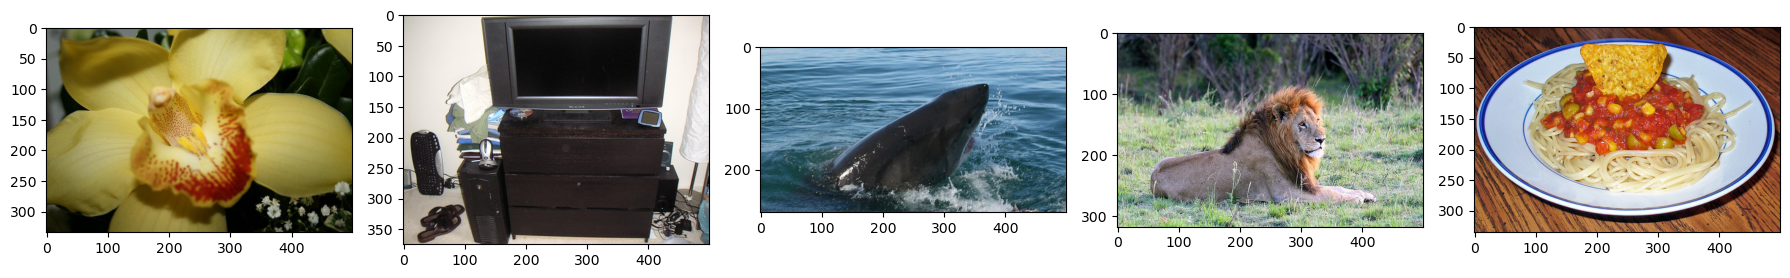

In [8]:
fig, _ = plt.subplots(1, len(lUrls), figsize=(18, 8))
for url, ax in zip(lUrls, fig.axes):
    mI = GetImageFromUrl(url)
    ax.imshow(mI.permute(1,2,0))
    
plt.tight_layout()
plt.show        ()

#### Preprocess before applying CNNs:

In [9]:
vMean = torch.tensor([0.485, 0.456, 0.406])
vStd  = torch.tensor([0.229, 0.224, 0.225])

oPreprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize    (256),
    transforms.CenterCrop(224),
    transforms.ToTensor  (),
    transforms.Normalize (mean=vMean, std=vStd),
])

#### Plot after preprocess (but keep mean and std):

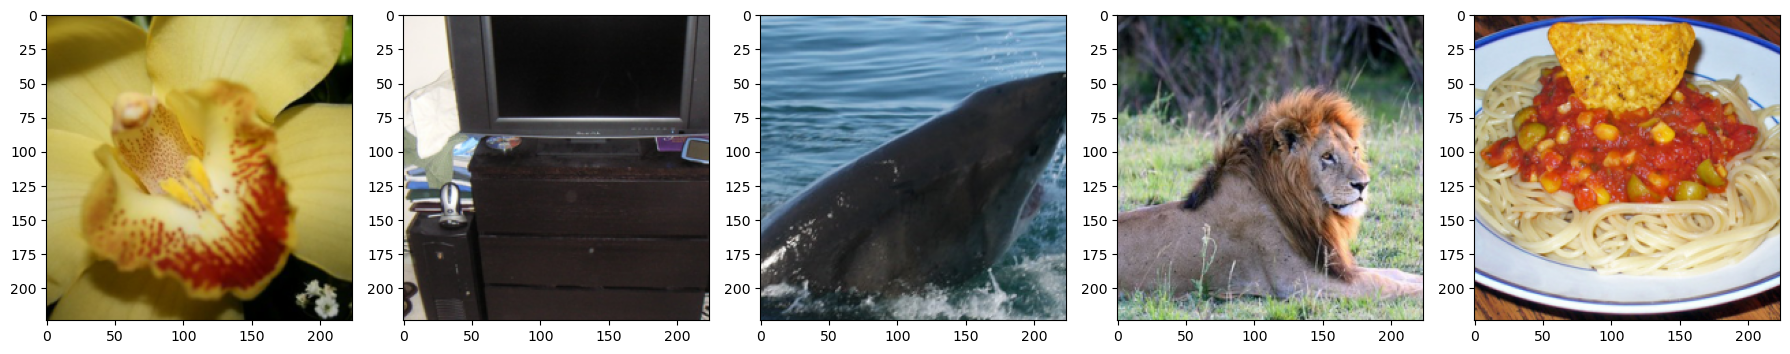

In [10]:
fig, _ = plt.subplots(1, len(lUrls), figsize=(18, 8))
for url, ax in zip(lUrls, fig.axes):
    mI = GetImageFromUrl(url)
    mI = oPreprocess(mI)
    mI = mI * vStd[:,None,None] + vMean[:,None,None]
    ax.imshow(mI.permute(1,2,0))
    
plt.tight_layout()
plt.show()

### AlexNet:

In [11]:
oAlexNet = torchvision.models.alexnet(pretrained=True)

torchinfo.summary(oAlexNet, (4, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  --                        --
├─Sequential: 1-1                        [4, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [4, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [4, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [4, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [4, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [4, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [4, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [4, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [4, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [4, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [4, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [4, 256, 13, 13]         

In [12]:
oAlexNet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### Switch to test mode:
`oModel.train(False)` or `oModel.eval()`

In [13]:
print('Train mode:', oAlexNet.training)

oAlexNet.train(False)
print('Train mode:', oAlexNet.training)

Train mode: True
Train mode: False


### VGG-16:

In [14]:
oVGG16 = torchvision.models.vgg16()

torchinfo.summary(oVGG16, (4, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [4, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [4, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [4, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [4, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [4, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [4, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [4, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [4, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [4, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [4, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [4, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [4, 256, 56, 56]          29

In [15]:
oVGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### GoogLeNet (v1):

In [16]:
oGoogLeNet = torchvision.models.googlenet(aux_logits=False, pretrained=True)
# torchinfo.summary(oGoogLeNet, (4, 3, 224, 224))

### ResNet 152:

In [17]:
oResNet152 = torchvision.models.resnet152(pretrained=True)

torchinfo.summary(oResNet152, (4, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   --                        --
├─Conv2d: 1-1                            [4, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [4, 64, 112, 112]         128
├─ReLU: 1-3                              [4, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [4, 64, 56, 56]           --
├─Sequential: 1-5                        [4, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [4, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [4, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [4, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [4, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [4, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [4, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [4, 64, 56, 56]           --
│ 

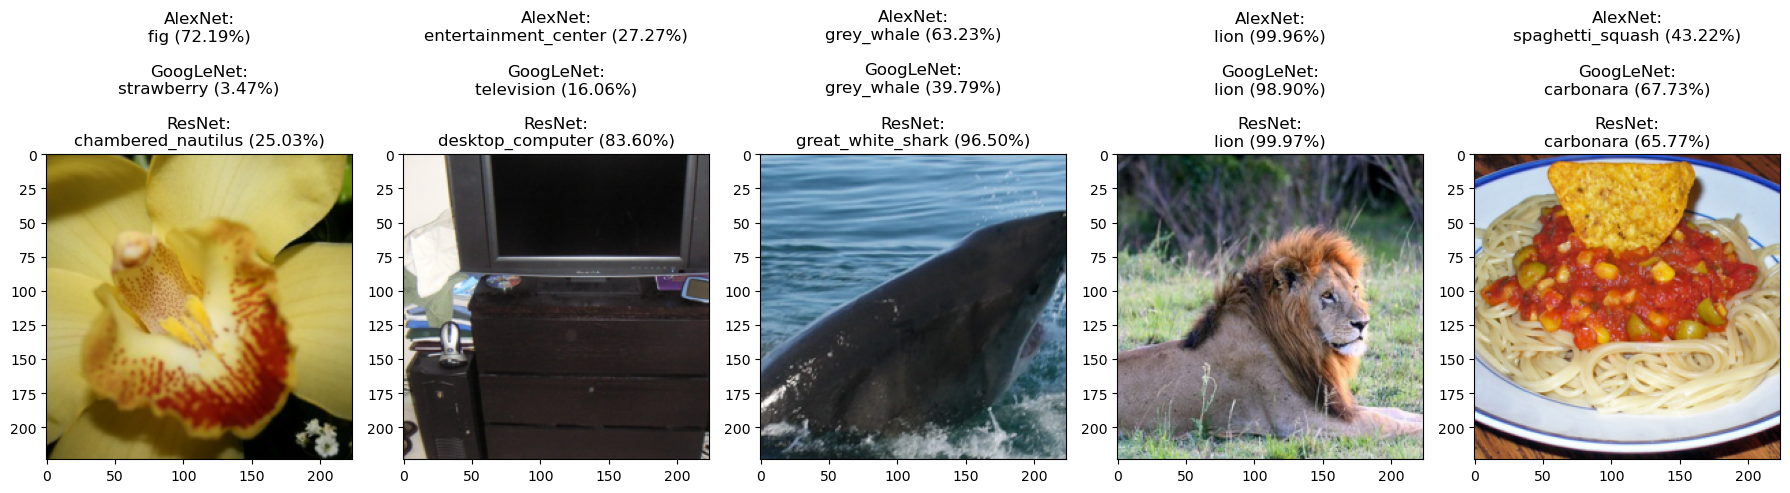

In [18]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

lModels = [oAlexNet, oGoogLeNet, oResNet152]
fig, _  = plt.subplots(1, len(lUrls), figsize=(18, 12))
for url, ax in zip(lUrls, fig.axes):
    mI     = GetImageFromUrl(url)
    mI     = oPreprocess(mI).to(DEVICE)
    
    title  = ''
    for oModel in lModels:
        modelName = oModel.__class__.__name__
        
        oModel.train(False)
        oModel.to   (DEVICE)         

        vHatY  = oModel       (mI[None,...])[0]
        vProb  = torch.softmax(vHatY, dim=0)
        idx    = torch.argmax (vHatY)
        
        title +=  modelName + ':\n' + f'{lClasses[idx]} ({vProb[idx]*100:.2f}%)' + '\n\n'
    
    mI2 = mI.cpu() * vStd[:,None,None] + vMean[:,None,None]
    ax.imshow   (mI2.permute(1,2,0))
    ax.set_title(title[:-2])
    
plt.tight_layout()
plt.show        ()